## Global Power Plant Database

### Problem Statement:

#### Description:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

#### Key attributes of the database:

The database includes the following indicators:

- country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- country_long (text): longer form of the country designation
- name (text): name or title of the power plant, generally in Romanized form
- gppd_idnr (text): 10 or 12 character identifier for the power plant
- capacity_mw (number): electrical generating capacity in megawatts
- latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- primary_fuel (text): energy source used in primary electricity generation or export
- other_fuel1 (text): energy source used in electricity generation or export
- other_fuel2 (text): energy source used in electricity generation or export
- other_fuel3 (text): energy source used in electricity generation or export
- commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
- owner (text): majority shareholder of the power plant, generally in Romanized form
- source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- url (text): web document corresponding to the `source` field
- geolocation_source (text): attribution for geolocation information
- wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- year_of_capacity_data (number): year the capacity information was reported
- generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
- generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
- generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
- generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
- generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
- generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
- generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
- generation_data_source (text): attribution for the reported generation information
- estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
- estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014 
- estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015 
- estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016 
- estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017 
- estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
- estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014 
- estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
- estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
- estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017 


#### Fuel Type Aggregation:

- We define the "Fuel Type" attribute of our database based on common fuel categories. 

### Prediction :   
- Make two prediction:
    - Fuel Type
    - capacity_mw

#### Importing required libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


#### Loading the database:

In [2]:
df = pd.read_csv('database_IND.csv')

df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


#### Exploratory Data Analysis (EDA):

In [3]:
# Checking for the shape of the dataset:

df.shape

(908, 25)

- The dataset contains 908 rows and 25 columns including the target columns.

- We've two target columns
    1. capacity_mw
    2. primary_fuel

In [5]:
# Checking for the columns of the dataset.

df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
# Checking for the datatype of the dataset

df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

- The dataset contains two datatypes: 'Object' and 'float'

In [7]:
# Checking for the missing values in the dataset

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [28]:
# Dropping country and country_long columns as it contains only 'India' as value.

df = df.drop('country', axis =1)
df = df.drop('country_long', axis =1)

df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority


- The dataset contains missing values in some columns.

In [8]:
# Checking for the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

- There are missing values in the dataset as said earlier.
- 13 columns contain float datatype and 12 columns contain object datatype.
- Following columns contains missing values:
    - latitude
    - longitude
    - other_fuel1
    - other_fuel2
    - other_fuel3
    - commissioning_year
    - owner
    - geolocation_source
    - wepp_id
    - year_of_capacity_data
    - generation_gwh_2013
    - generation_gwh_2014
    - generation_gwh_2015
    - generation_gwh_2016
    - generation_gwh_2017
    - generation_data_source
    - estimated_generation_gwh
    
- The column 'other_fuel2' contains only 1 value. So, it is better to drop this column.
- The columns 'other_fuel3', 'wepp_id', and 'estimated_generation_gwh' do not contain any values. So, we'll drop these columns.

In [9]:
# Dropping the 'other_fuel2' column:

df = df.drop('other_fuel2', axis = 1)

In [10]:
# Dropping the 'other_fuel3' column:

df = df.drop('other_fuel3', axis = 1)

In [11]:
# Dropping the 'wepp_id' column:

df = df.drop('wepp_id', axis =1)

In [12]:
# Dropping the 'estimated_generation_gwh' column.

df = df.drop('estimated_generation_gwh', axis =1)

In [47]:
# Dropping the url column as it is not contributing to the dataset.

df = df.drop('url', axis = 1)

In [48]:
# Checking the dataset again.

df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,NaN,AES,CDM,WRI,NaN,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.0,NaN,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority


#### Checking for the missing values again:

In [49]:
df.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1                 0
commissioning_year        380
owner                     566
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_data_source    458
dtype: int64

#### Handling the missing values:

1. generation_gwh_2013

We'll replace the missing values with the mean value of the generation_gwh_2013 column.

In [17]:
# Checking for the mean

df['generation_gwh_2013'].mean()

2304.0592017964586

In [18]:
# Replacing the missing values

df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean(), inplace=True)

2. generation_gwh_2014

We'll replace the missing values with the mean value of the generation_gwh_2014 column.

In [19]:
# Checking for the mean value

df['generation_gwh_2014'].mean()

2420.3933164542264

In [20]:
# Replacing the missing values with the mean

df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(), inplace=True)

3. generation_gwh_2015

We'll replace the missing values with mean value of the generation_gwh_2015 column.

In [22]:
# Checking for the mean value.

df['generation_gwh_2015'].mean()

2414.072373401681

In [23]:
# Replacing the missing values with the mean

df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(), inplace=True)

4. generation_gwh_2016

We'll replace the missing values with mean value of the generation_gwh_2016 column.

In [24]:
# Checking for the mean value.

df['generation_gwh_2016'].mean()

2453.9362918708252

In [25]:
# Replacing the missing values with the mean

df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(), inplace=True)

5. generation_gwh_2017

We'll replace the missing values with mean value of the generation_gwh_2017 column.

In [26]:
# Checking for the mean value.

df['generation_gwh_2017'].mean()

2531.7544577527983

In [27]:
# Replacing the missing values with the mean

df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(), inplace=True)

6. other_fuel1 

We'll replace the missing values of other_fuel1 column with '0' to denote other fuel option is not avaiable in the respective plant.

In [43]:
# Checking for the value counts

df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [46]:
# Replacing the missing values with '0'

df['other_fuel1'].fillna('0', inplace=True)

7. commissioning_year

We'll replace the missing values with the median of the column commissioning_year

In [53]:
# Checking the value counts 
df['commissioning_year'].median()

2000.0

In [54]:
# Replacing the missing values

df['commissioning_year'].fillna('2000', inplace=True)

#### Analyzing the target column:

In [14]:
# Checking the value counts.

df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

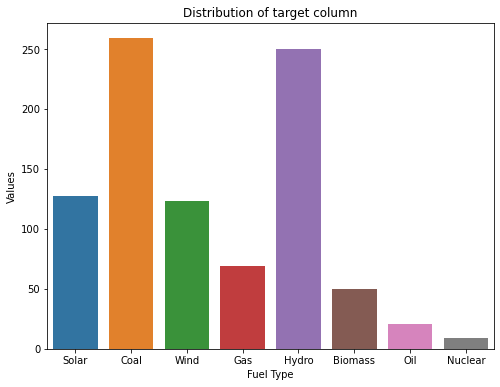

In [15]:
# Plotting bar plot to show the distribution of target coulmn.

plt.figure(figsize=[8,6])
sns.countplot(x='primary_fuel', data=df)
plt.xlabel('Fuel Type')
plt.ylabel('Values')
plt.title('Distribution of target column')
plt.show()

- We can see that the target column 'primary_fuel' is imbalanced. We'll balance it later.

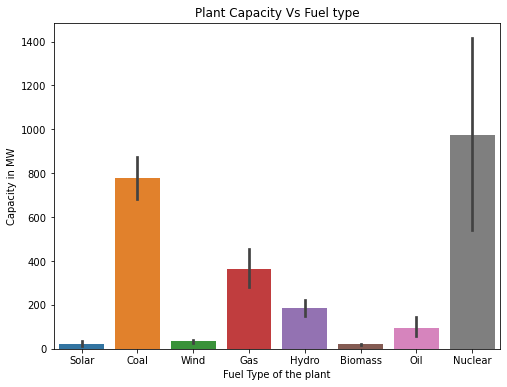

In [35]:
# Checking the distribution of capacity of plants fuel type wise

plt.figure(figsize=[8,6])
sns.barplot(x='primary_fuel', y='capacity_mw', data=df)
plt.xlabel('Fuel Type of the plant')
plt.ylabel('Capacity in MW')
plt.title('Plant Capacity Vs Fuel type')
plt.show()

- We can see that the Nuclear type power plants have highest capacity.
- Coal type power plants have the second highest capacity.

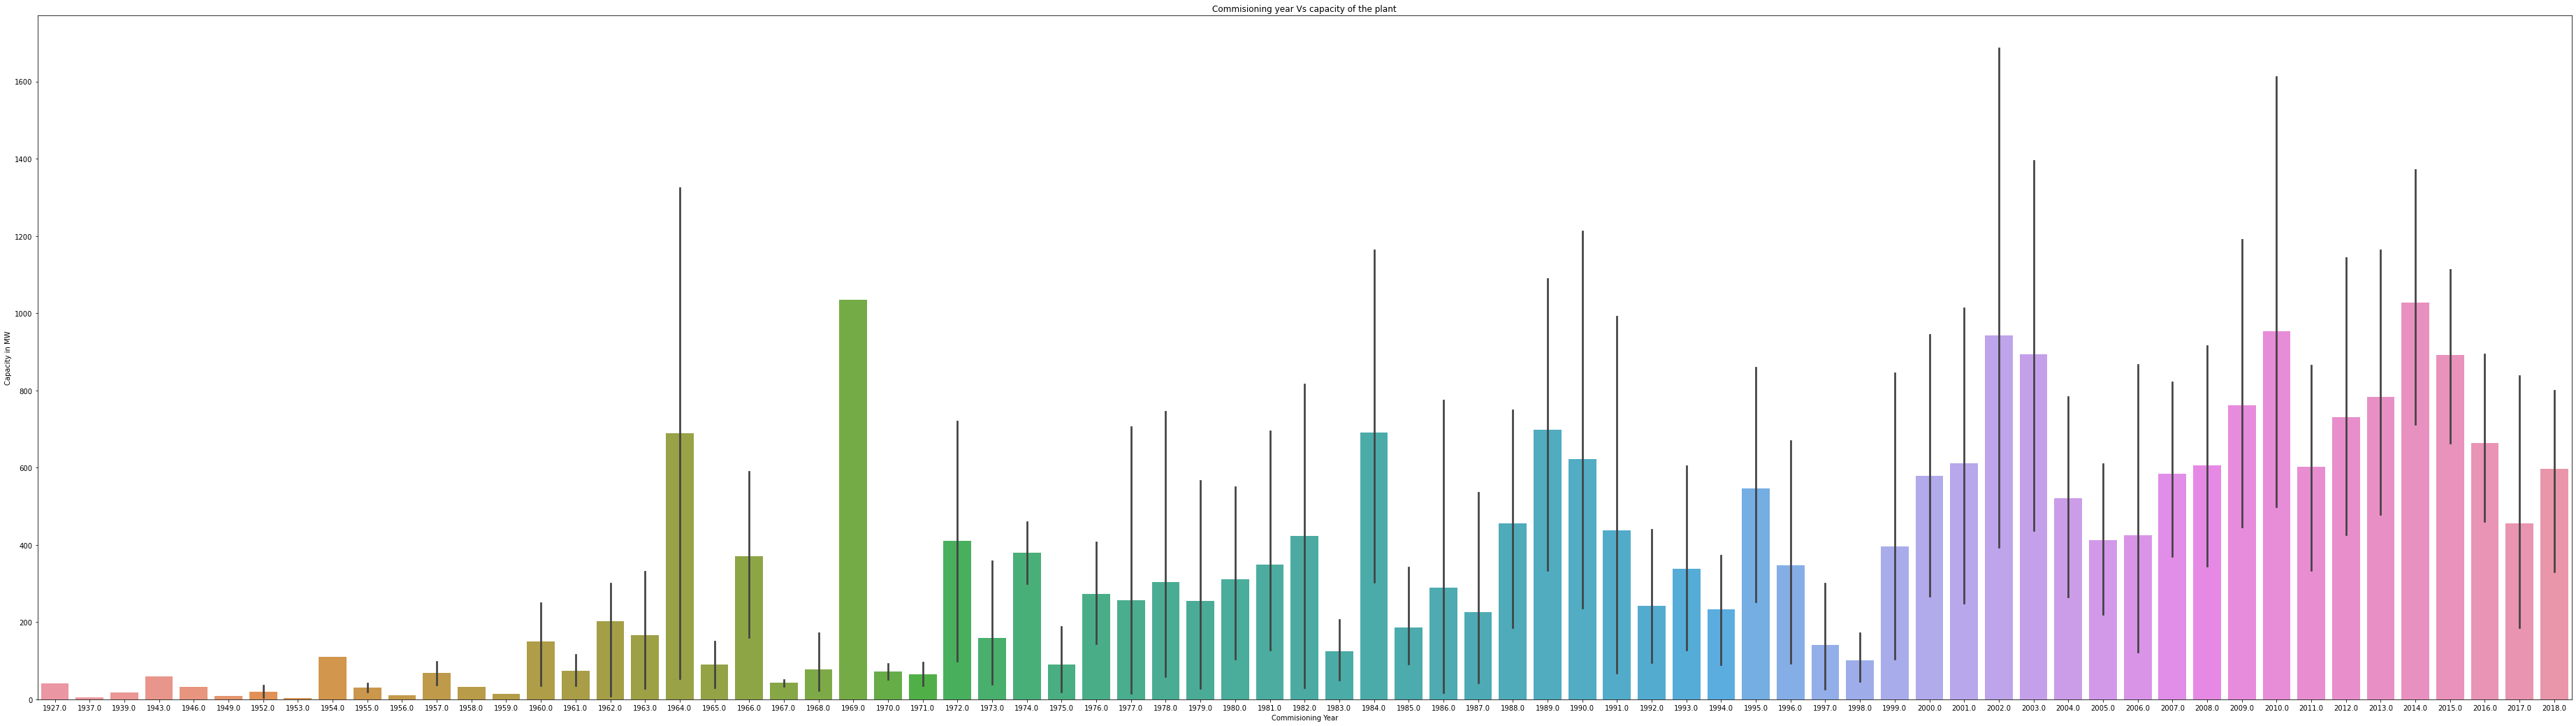

In [38]:
# Checking the distribution of capacity Vs commissioning_year

plt.figure(figsize=[65,18])
sns.barplot(x='commissioning_year', y='capacity_mw', data=df)
plt.xlabel('Commisioning Year')
plt.ylabel('Capacity in MW')
plt.title('Commisioning year Vs capacity of the plant')
plt.show()

- From the graph we can say that the new plants have more capacity than the older plants.

#### Label encoding the categorical variables:

In [50]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

variables = ['name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'owner', 'source']
for v in variables:
    df[v] = label.fit_transform(df[v])

In [70]:
# Dropping 'geolocation_source' 

df = df.drop('geolocation_source', axis=1)

In [71]:
# Dropping 'generation_data_source'

df = df.drop('generation_data_source', axis=1)

In [72]:
# Checking for the dataset again after label encoding

df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,658,2.5,28.1839,73.2407,6,2,2011,229,109,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,1,520,98.0,24.7663,74.6090,1,2,2000,258,174,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,2,854,39.2,21.9038,69.3732,7,2,2000,2,21,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,3,0,135.0,23.8712,91.3602,2,2,2004,280,22,631.777928,617.789264,843.747000,886.004428,663.774500
4,4,1,1800.0,21.9603,82.4091,1,2,2015,280,22,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


#### Checking for the data distribution among all the columns:

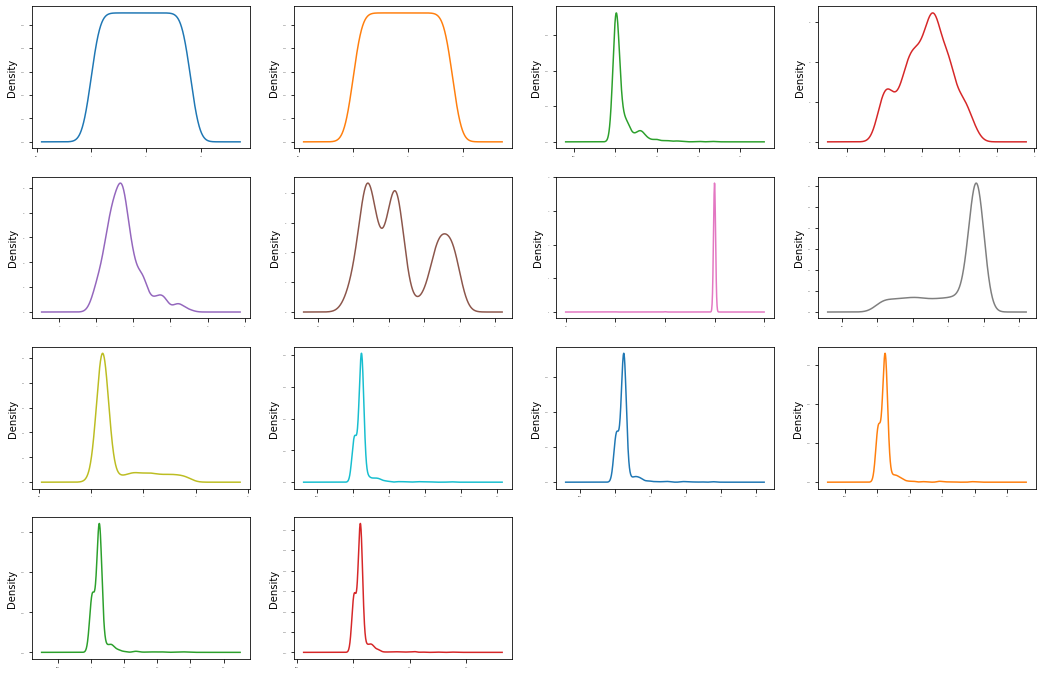

In [73]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1, figsize=[18,12])
plt.show()

- This shows that there are skewness in the dataset.
- We'll check for the skewness later.

#### Checking for the Statistical Summary:

In [74]:
df.describe()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,owner,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.00000,908.00000,908.000000,862.000000,862.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,453.50000,453.50000,321.046378,21.196189,77.447848,3.205947,1.995595,227.534141,43.823789,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,262.26132,262.26132,580.221767,6.248627,4.907260,2.281339,0.081214,83.895877,44.624092,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.00000,0.00000,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226.75000,226.75000,16.837500,16.771575,74.258975,1.000000,2.000000,188.750000,22.000000,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,453.50000,453.50000,60.000000,21.778300,76.719250,3.000000,2.000000,280.000000,22.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,680.25000,680.25000,388.125000,25.516375,79.441475,6.000000,2.000000,280.000000,29.250000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,907.00000,907.00000,4760.000000,34.649000,95.408000,7.000000,2.000000,280.000000,190.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


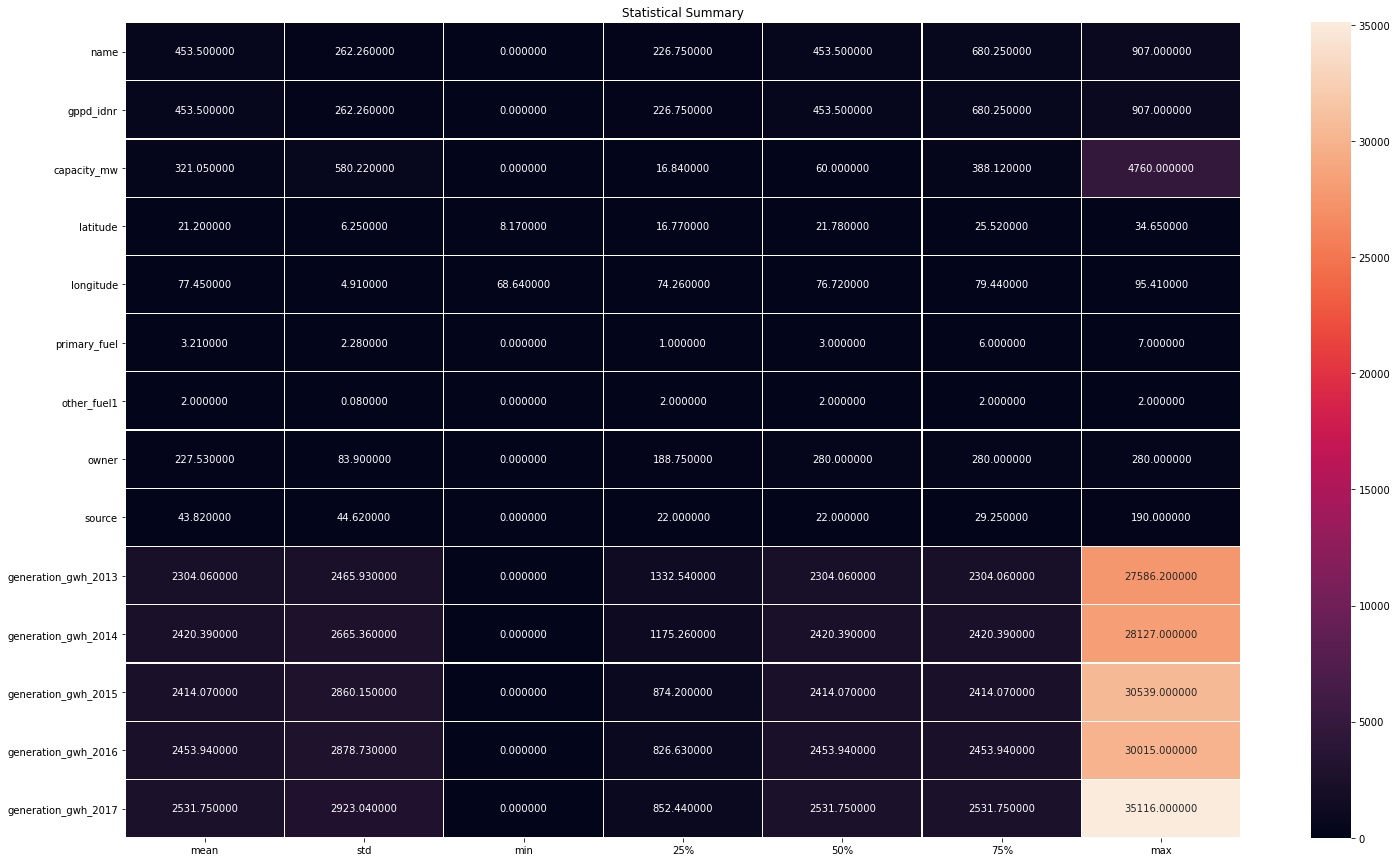

In [75]:
# Plotting Heatmap for Statistical Summary

plt.figure(figsize=[25,15])
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Statistical Summary')
plt.show()

#### Checking for the Correlation of the variables:

In [76]:
df.corr()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,owner,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
name,1.000000,0.336792,0.059870,-0.137176,0.019133,0.038752,-0.074643,1.167146e-01,-1.380057e-02,8.269905e-02,8.491457e-02,7.514018e-02,6.780015e-02,7.526164e-02
gppd_idnr,0.336792,1.000000,-0.334308,-0.109348,-0.392553,0.607373,0.001812,-6.021076e-01,4.165747e-01,4.418679e-02,4.539080e-02,3.996483e-02,2.794672e-02,2.407891e-02
capacity_mw,0.059870,-0.334308,1.000000,0.050107,0.198377,-0.377783,0.002672,3.036718e-01,-2.417009e-01,6.678419e-01,7.054341e-01,7.220814e-01,7.528288e-01,7.670398e-01
latitude,-0.137176,-0.109348,0.050107,1.000000,0.031501,-0.013882,0.036609,7.173619e-03,5.654375e-02,3.673601e-02,4.419433e-02,3.622500e-02,3.102370e-02,3.076994e-02
longitude,0.019133,-0.392553,0.198377,0.031501,1.000000,-0.359828,0.030300,2.834315e-01,-2.415750e-01,1.405790e-02,1.169775e-02,1.922832e-02,3.987511e-02,4.055842e-02
primary_fuel,0.038752,0.607373,-0.377783,-0.013882,-0.359828,1.000000,0.004902,-2.601736e-01,5.360860e-02,-1.205116e-01,-1.249997e-01,-1.251376e-01,-1.313584e-01,-1.321741e-01
other_fuel1,-0.074643,0.001812,0.002672,0.036609,0.030300,0.004902,1.000000,-3.395905e-02,2.655707e-02,2.590227e-02,2.425847e-02,2.649904e-02,3.128383e-02,2.087114e-02
owner,0.116715,-0.602108,0.303672,0.007174,0.283432,-0.260174,-0.033959,1.000000e+00,-2.438403e-01,-4.798636e-17,-3.967998e-17,2.878648e-17,3.868733e-17,1.421944e-16
source,-0.013801,0.416575,-0.241701,0.056544,-0.241575,0.053609,0.026557,-2.438403e-01,1.000000e+00,1.148485e-16,1.129442e-17,3.266585e-17,2.296820e-17,-1.191072e-16
generation_gwh_2013,0.082699,0.044187,0.667842,0.036736,0.014058,-0.120512,0.025902,-4.798636e-17,1.148485e-16,1.000000e+00,9.634535e-01,8.963761e-01,8.735420e-01,8.306385e-01


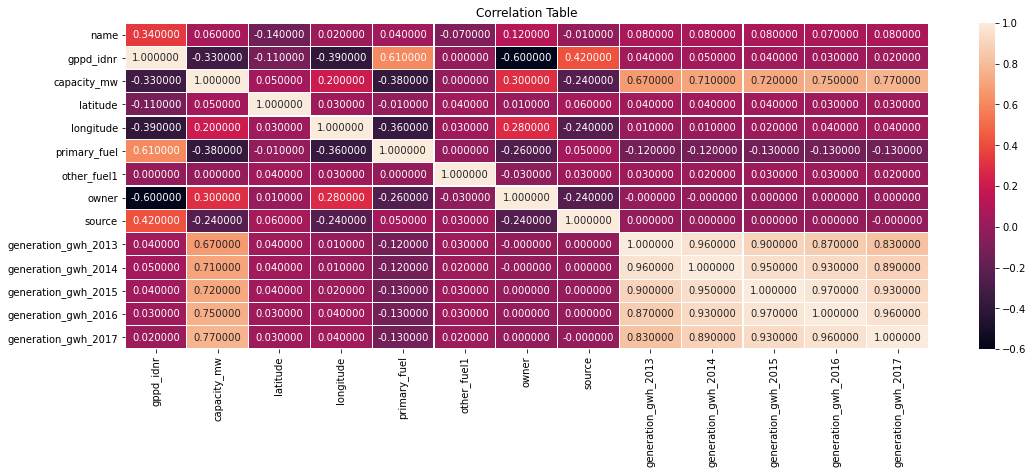

In [77]:
### Plotting heatmap for the correlation table

plt.figure(figsize=[18,6])
sns.heatmap(round(df.corr()[1:].transpose(),2), annot=True, linewidths=0.25, linecolor='white', fmt='f')
plt.title('Correlation Table')
plt.show()

#### Outcomes of Correlation table

1. For 'capacity_mw' target column
    - name column has 6% correlation with the target column 'capacity_mw'
    - gppd_idnr has -33% correlation with the target column 'capacity_mw', which can be considered as very weak bond.
    - latitude has 5% correlation with the target column 'capacity_mw'.
    - longitude has 20% correlation with the target column 'capacity_mw'.
    - primary_fuel has -38% correlation with the target column 'capacity_mw', which can be considered as very weak bond.
    - other_fuel1 has 0% correlation with the target column.
    - owner column has 30% correlation with the target column, which can be considered as strong bond.
    - source has -24% correlation.(very weak bond)
    - year_of_capacity_data has no values so we'll drop this column.
    - generation_gwh_2013 has 67% correlation which can be considered as very strong bond.
    - generation_gwh_2014 has 71% correlation which can be considered as very strong bond.
    - generation_gwh_2015 has 72% correlation which can be considered as very strong bond.
    - generation_gwh_2016 has 75% correlation which can be considerd as very strong bond.
    - generation_gwh_2017 has 77% correlation which can be considered as very strong bond.
    
-----------------------------------------------------------------------------------------------------

2. For 'primary_fuel' as target column
    - name column has 4% correlation.
    - gppd_idnr has 61% correlation which can be considered as very strong bond.
    - capacity_mw has -38% correlation, which can be considerd as very weak bond.
    - latitude has -1% correlation.
    - longitude has -36% correlation which can be considerd as very weak bond.
    - otherfuel1 has 0% correlation.
    - owner has -26% correlation, which can be considered as very weak bond.
    - source has 5% correlation.
    - generation_gwh_2013 has -12% correlation.(weak bond)
    - generation_gwh_2014 has -12% correlation. (weak bond)
    - generation_gwh_2015 has -13% correlation. (weak bond)
    - generation_gwh_2016 has -13% correlation. (weak bond)
    - generation_gwh_2017 has -13% correlation. (weak bond)

In [85]:
# dropping other_fuel1 and owner as they are not contributing to the dataset

df = df.drop('other_fuel1', axis=1)
df = df.drop('owner', axis = 1)

#### Checking for outliers and skewness:

In [91]:
# Splitting the data in independent and target variable.
# 'primary_fuel' as target variable:
x = df.drop(['primary_fuel'],axis=1)
y = df['primary_fuel']

# 'capacity_mw' as target variable:

x1 = df.drop(['capacity_mw'], axis=1)
y1 = df['capacity_mw']

In [92]:
#cheking for skewness in x

x.skew()

name                   0.000000
gppd_idnr              0.000000
capacity_mw            3.193257
latitude              -0.143622
longitude              1.100942
commissioning_year    -1.650230
source                 1.829145
generation_gwh_2013    5.241491
generation_gwh_2014    5.041961
generation_gwh_2015    5.367370
generation_gwh_2016    5.071758
generation_gwh_2017    5.111938
dtype: float64

In [93]:
# Checking for skewness in x1

x1.skew()

name                   0.000000
gppd_idnr              0.000000
latitude              -0.143622
longitude              1.100942
primary_fuel           0.471141
commissioning_year    -1.650230
source                 1.829145
generation_gwh_2013    5.241491
generation_gwh_2014    5.041961
generation_gwh_2015    5.367370
generation_gwh_2016    5.071758
generation_gwh_2017    5.111938
dtype: float64

#### Remove the skewness:
We're using power_transform function to remove skewness from the dataset.

In [94]:
# Removing skewness from 'x'
from sklearn.preprocessing import power_transform

df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns=x.columns)

df_new.skew()

name                  -0.288181
gppd_idnr             -0.288181
capacity_mw            0.020461
latitude              -0.088275
longitude              0.017088
commissioning_year    -0.426588
source                -0.214850
generation_gwh_2013    0.180340
generation_gwh_2014    0.124543
generation_gwh_2015    0.070937
generation_gwh_2016    0.038668
generation_gwh_2017    0.013392
dtype: float64

In [95]:
# Removing skewness from 'x1'

from sklearn.preprocessing import power_transform

df_new1 = power_transform(x1)

df_new1 = pd.DataFrame(df_new, columns=x1.columns)

df_new1.skew()

name                  -0.288181
gppd_idnr             -0.288181
latitude              -0.088275
longitude              0.017088
primary_fuel                NaN
commissioning_year    -0.426588
source                -0.214850
generation_gwh_2013    0.180340
generation_gwh_2014    0.124543
generation_gwh_2015    0.070937
generation_gwh_2016    0.038668
generation_gwh_2017    0.013392
dtype: float64